In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir(r"C:\Users\Colburn_Hassman\Desktop")

In [3]:
data = pd.read_csv("weather_01.csv")
data.head()

,STATION,NAME,DATE,AWND,PRCP,TAVG,TMAX,TMIN,TSUN
0,USW00023044,"EL PASO INTERNATIONAL AIRPORT, TX US",2002-01-01,5.59,0.0,38.0,43.0,32.0,0.0
1,USW00023044,"EL PASO INTERNATIONAL AIRPORT, TX US",2002-01-02,6.26,0.0,34.0,39.0,29.0,0.0
2,USW00023044,"EL PASO INTERNATIONAL AIRPORT, TX US",2002-01-03,3.36,0.0,37.0,50.0,23.0,0.0
3,USW00023044,"EL PASO INTERNATIONAL AIRPORT, TX US",2002-01-04,12.53,0.0,47.0,59.0,34.0,0.0
4,USW00023044,"EL PASO INTERNATIONAL AIRPORT, TX US",2002-01-05,3.58,0.0,41.0,52.0,30.0,0.0


In [4]:
data['NAME'].unique()

array(['EL PASO INTERNATIONAL AIRPORT, TX US',
       'CORPUS CHRISTI INTERNATIONAL AIRPORT, TX US',
       'HOUSTON INTERCONTINENTAL AIRPORT, TX US',
       'SAN ANTONIO STINSON MUNICIPAL AIRPORT, TX US',
       'DALLAS FAA AIRPORT, TX US'], dtype=object)

In [5]:
# This should be generalized to the other ones... not sure I can loop and stuff
h

In [6]:
# The real challenge is converting from min max to average

# choose a day to work from
EL_PASO['AMP'] = (EL_PASO['TMAX'] - EL_PASO['TMIN'])/2
EL_PASO['TAVG_1'] = EL_PASO['TAVG'].shift(-1)
EL_PASO['AMP_1'] = EL_PASO['AMP'].shift(-1)
d_temp = EL_PASO.iloc[8]
print(d_temp)

STATION                             USW00023044
NAME       EL PASO INTERNATIONAL AIRPORT, TX US
DATE                                 2002-01-09
AWND                                       5.59
PRCP                                          0
TAVG                                         51
TMAX                                         68
TMIN                                         33
TSUN                                          0
AMP                                        17.5
TAVG_1                                       54
AMP_1                                        11
Name: 8, dtype: object


C:\Users\Colburn_Hassman\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Colburn_Hassman\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Colburn_Hassman\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [7]:
EL_PASO.head()

,STATION,NAME,DATE,AWND,PRCP,TAVG,TMAX,TMIN,TSUN,AMP,TAVG_1,AMP_1
0,USW00023044,"EL PASO INTERNATIONAL AIRPORT, TX US",2002-01-01,5.59,0.0,38.0,43.0,32.0,0.0,5.5,34.0,5.0
1,USW00023044,"EL PASO INTERNATIONAL AIRPORT, TX US",2002-01-02,6.26,0.0,34.0,39.0,29.0,0.0,5.0,37.0,13.5
2,USW00023044,"EL PASO INTERNATIONAL AIRPORT, TX US",2002-01-03,3.36,0.0,37.0,50.0,23.0,0.0,13.5,47.0,12.5
3,USW00023044,"EL PASO INTERNATIONAL AIRPORT, TX US",2002-01-04,12.53,0.0,47.0,59.0,34.0,0.0,12.5,41.0,11.0
4,USW00023044,"EL PASO INTERNATIONAL AIRPORT, TX US",2002-01-05,3.58,0.0,41.0,52.0,30.0,0.0,11.0,41.0,16.0


In [8]:
hours = np.arange(0,24) # add step with another column
temp = []
RISE = 8
for hour in hours:
    if hour <= RISE:
        t = d_temp['TAVG'] - d_temp['AMP'] * (np.cos((np.pi*hour/(10+RISE))))
        temp.append(t)
    elif hour > RISE & hour <= 14:
        t = d_temp['TAVG'] + d_temp['AMP'] * (np.cos((np.pi*(hour-RISE)/14-RISE)))
        temp.append(t)
    else:
        t = d_temp['TAVG'] - d_temp['AMP'] * (np.cos((np.pi*hour/(10+RISE))))
        temp.append(t)
                                            


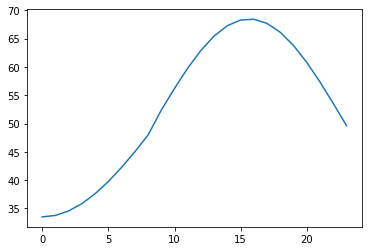

In [9]:
plt.plot(hours, temp)

In [10]:
# Max and Min temps line up with actual.
print(max(temp), min(temp))

68.446271030898 33.5


In [11]:
date_time = []
for hour in hours:
    time = "{:02d}:00".format(hour)
    date_time.append(d_temp['DATE'] + " " + time)
    
print(date_time)

['2002-01-09 00:00', '2002-01-09 01:00', '2002-01-09 02:00', '2002-01-09 03:00', '2002-01-09 04:00', '2002-01-09 05:00', '2002-01-09 06:00', '2002-01-09 07:00', '2002-01-09 08:00', '2002-01-09 09:00', '2002-01-09 10:00', '2002-01-09 11:00', '2002-01-09 12:00', '2002-01-09 13:00', '2002-01-09 14:00', '2002-01-09 15:00', '2002-01-09 16:00', '2002-01-09 17:00', '2002-01-09 18:00', '2002-01-09 19:00', '2002-01-09 20:00', '2002-01-09 21:00', '2002-01-09 22:00', '2002-01-09 23:00']


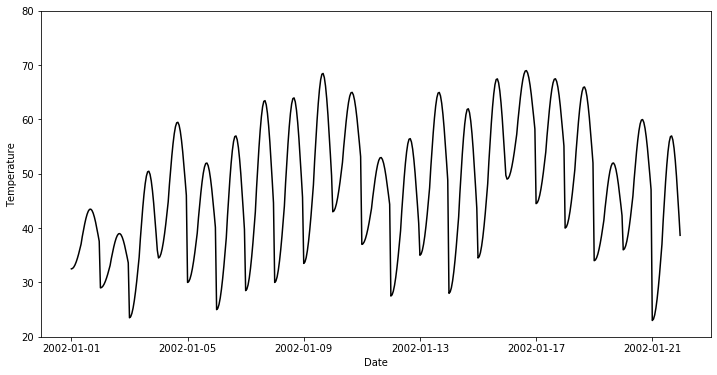

In [49]:
# make a function of the above 
def hourly(row):
    hours = np.arange(0,24) # add step with another column
    date_time = []
    temp = []
    RISE = 8
    for hour in hours:
        # Make timestamp
        time = "{:02d}:00".format(hour)
        date_time.append(row['DATE'] + " " + time)
        # Make temperature
        if hour <= RISE:
            t = row['TAVG'] - row['AMP'] * (np.cos((np.pi*hour/(10+RISE))))
            temp.append(t)
        elif hour > RISE & hour <= 14:
            t = row['TAVG'] + row['AMP'] * (np.cos((np.pi*(hour-RISE)/14-RISE)))
            temp.append(t)
        else:
            t = row['TAVG_1'] - row['AMP_1'] * (np.cos((np.pi*hour/(10+RISE))))
            temp.append(t)
        
    return date_time, temp
    
df =  EL_PASO.iloc[0:21]
Date = []
Temperature = []
for index, row in df.iterrows():
    date, temp = hourly(row) # returns lists of hourly timestamps and temperature estimates
    # Unpacks the lists and appends them individually
    for time in date:
        Date.append(time)
    for t in temp:
        Temperature.append(t)
        
temp_df = pd.DataFrame()
temp_df['Date'] = Date
temp_df['Temp'] = Temperature

temp_df['Date'] = pd.to_datetime(temp_df['Date'])
temp_df.set_index("Date", inplace = True)


plt.figure(figsize = (12,6))
plt.plot(temp_df.index, temp_df['Temp'], color = 'k')
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.ylim(20,80)
plt.show()


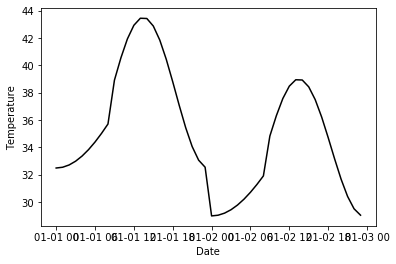

In [15]:
print(temp_df)

                          Temp
Date                          
2002-01-01 00:00:00  32.500000
2002-01-01 01:00:00  32.583557
2002-01-01 02:00:00  32.831691
2002-01-01 03:00:00  33.236860
2002-01-01 04:00:00  33.786756
...                        ...
2002-01-03 19:00:00  46.863252
2002-01-03 20:00:00  44.564826
2002-01-03 21:00:00  41.887067
2002-01-03 22:00:00  38.964250
2002-01-03 23:00:00  35.942938

[72 rows x 1 columns]
